In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [6]:
##Image Augmentation 

train_datagen = ImageDataGenerator(
    rescale = 1./255, ##normalize
    rotation_range=10,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest',)

training_set = train_datagen.flow_from_directory(
        r"ASD\AugTrainTest\train",
        target_size=(200, 200),
        batch_size=32,
        class_mode='binary',
        
        )

test_datagen = ImageDataGenerator(
        rescale=1./255, 
        rotation_range=10,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')

testing_set = test_datagen.flow_from_directory(
        r"ASD\AugTrainTest\test",
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

training_set.class_indices

Found 2039 images belonging to 2 classes.
Found 511 images belonging to 2 classes.


{'Control': 0, 'Patient': 1}

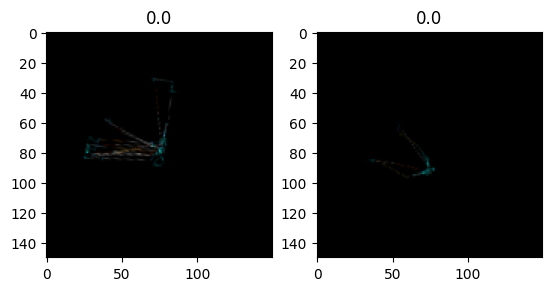

In [7]:
# get a batch of images and labels from the training set
images, labels = next(training_set)
# create a figure with 2x2 grid of subplots
fig, axes = plt.subplots(1, 2)

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title(labels[i])

# show the figure
plt.show()

In [9]:
##Defining the Network 
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation ='relu', input_shape=[150,150,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation ='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units= 256, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units= 1, activation = 'sigmoid'))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
## Training
history = cnn.fit(x=training_set, validation_data=testing_set, epochs = 10)

Epoch 1/10
64/64 [==============================] - 26s 391ms/step - loss: 0.5720 - accuracy: 0.6999 - val_loss: 0.5234 - val_accuracy: 0.7339
Epoch 2/10
64/64 [==============================] - 24s 379ms/step - loss: 0.5020 - accuracy: 0.7592 - val_loss: 0.5091 - val_accuracy: 0.7299
Epoch 3/10
64/64 [==============================] - 24s 380ms/step - loss: 0.4567 - accuracy: 0.7719 - val_loss: 0.5069 - val_accuracy: 0.7436
Epoch 4/10
64/64 [==============================] - 24s 380ms/step - loss: 0.4423 - accuracy: 0.7911 - val_loss: 0.5043 - val_accuracy: 0.7534
Epoch 5/10
64/64 [==============================] - 24s 376ms/step - loss: 0.3770 - accuracy: 0.8269 - val_loss: 0.4964 - val_accuracy: 0.7652
Epoch 6/10
64/64 [==============================] - 24s 381ms/step - loss: 0.3562 - accuracy: 0.8352 - val_loss: 0.4758 - val_accuracy: 0.7652
Epoch 7/10
64/64 [==============================] - 25s 384ms/step - loss: 0.3153 - accuracy: 0.8568 - val_loss: 0.5440 - val_accuracy: 0.7710

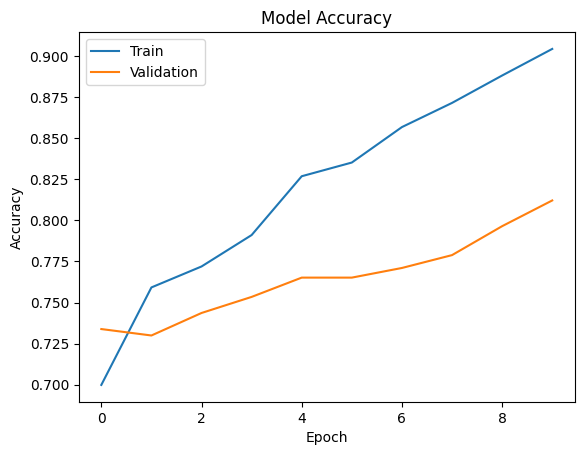

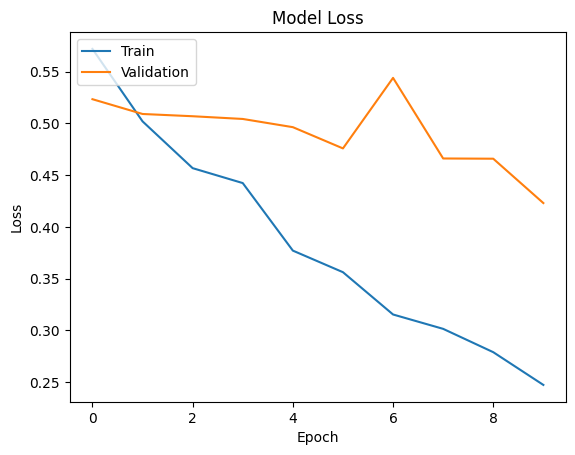

In [11]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

C:\Users\786me\AppData\Local\Temp\ipykernel_15224\1906504400.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = cnn.predict_generator(testing_set, testing_set.samples // testing_set.batch_size+1)


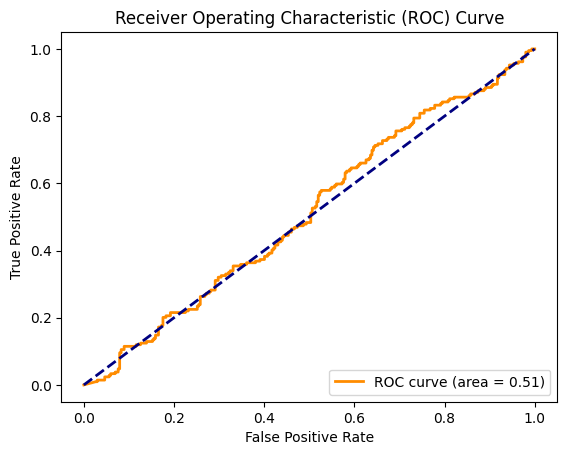

In [14]:
from sklearn.metrics import roc_curve, auc
y_pred = cnn.predict_generator(testing_set, testing_set.samples // testing_set.batch_size+1)
y_true = testing_set.classes

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()